### Exploratory Data Analysis of FSIS Processing Plant Data

This notebook analyzes the meat inspection plant records from FSIS by type, location, and parent corporation.

In [1]:
import pandas as pd
import numpy as np

In [2]:
fsis_raw = pd.read_csv("../data/raw/fsis-processors-with-location.csv")
fsis_raw.head()

,Unnamed: 0,EstNumber,EstID,Parent Corporation,Establishment Name,State,Size,Animals Processed,Processed\nVolume\nCategory,Slaughter\nVolume\nCategory,Full Address,latitude,longitude
0,0,M267,4802,JBS,JBS Tolleson Inc.,AZ,Large,Beef,5.0,4.0,"651 S. 91st Ave, Tolleson, AZ 85353",33.441660,-112.252559
1,1,M354,5117,Cargill,Cargill Meat Solutions,CA,Large,Beef,5.0,4.0,"3115 S. Fig Ave., Fresno, CA 93706",36.689651,-119.801950
2,2,M6063A,5289,Central Valley Meat Company,"Central Valley Meat Co., Inc.",CA,Large,Beef,5.0,4.0,"10431 8 3/4 Ave., Hanford, CA 93230",36.321273,-119.612222
3,3,M783 + P783 + V783,5144,Central Valley Meat Company,Harris Ranch Beef Company,CA,Large,Beef,5.0,4.0,"16277 S McCall Ave., Selma, CA 93662",36.499212,-119.614553
4,4,M21488 + V21488,8349,Independent,OWB Packers LLC,CA,Large,Beef,4.0,4.0,"57 East Shank Road, Brawley, CA 92227",33.000969,-115.521786


#### Looking at types, sizes, and location distribution of plants

In [3]:
print("There are", len(fsis_raw), "plants in this dataset.")
fsis_raw["Animals Processed"].value_counts()

There are 1149 plants in this dataset.


Animals Processed
Beef,Pork,Sheep/Lamb                   420
Chicken                                184
Beef                                   141
Pork                                   107
Beef,Pork                               92
Beef,Sheep/Lamb                         66
Turkey                                  39
Chicken,Turkey                          29
Turkey,Chicken                          21
Sheep/Lamb                              17
Beef,Pork,Chicken,Turkey,Sheep/Lamb     11
Beef,Pork,Sheep/Lamb,Chicken,Turkey      5
Sheep/Lamb,Pork                          5
Beef,Pork,Chicken,Turkey                 3
Pork,Sheep/Lamb                          3
Beef,Pork,Sheep/Lamb,Chicken             2
Beef,Chicken,Turkey                      1
Pork,Turkey                              1
Sheep/Lamb,Pork,Chicken,Turkey           1
Beef,Sheep/Lamb,Chicken,Turkey           1
Name: count, dtype: int64

In [4]:
just_combination = fsis_raw[fsis_raw["Animals Processed"].str.contains(",")]
print("There are", len(just_combination), "combination processing plants in this dataset")
print("The most common combination plant produces Beef, Pork, and Sheep")
print(just_combination["Animals Processed"].value_counts())

x = 420 + 66 + 1
y = 92 + 66 + 29 + 21 + 5 + 3 + 1
z = 11 + 5 + 3 + 2 + 1 + 1
print("There are", y, "plants that process 2 types of animals")
print ("There are", x, "plants that process 3 types of animals")
print ("There are", z, "plants that process 4+ types of animals")

There are 661 combination processing plants in this dataset
The most common combination plant produces Beef, Pork, and Sheep
Animals Processed
Beef,Pork,Sheep/Lamb                   420
Beef,Pork                               92
Beef,Sheep/Lamb                         66
Chicken,Turkey                          29
Turkey,Chicken                          21
Beef,Pork,Chicken,Turkey,Sheep/Lamb     11
Beef,Pork,Sheep/Lamb,Chicken,Turkey      5
Sheep/Lamb,Pork                          5
Beef,Pork,Chicken,Turkey                 3
Pork,Sheep/Lamb                          3
Beef,Pork,Sheep/Lamb,Chicken             2
Beef,Chicken,Turkey                      1
Pork,Turkey                              1
Sheep/Lamb,Pork,Chicken,Turkey           1
Beef,Sheep/Lamb,Chicken,Turkey           1
Name: count, dtype: int64
There are 217 plants that process 2 types of animals
There are 487 plants that process 3 types of animals
There are 23 plants that process 4+ types of animals


In [5]:
animals = ["Beef", "Pork", "Sheep/Lamb", "Chicken", "Turkey"]
distrib = {}

for animal in animals:
    fsis_raw[animal] = fsis_raw['Animals Processed'].str.contains(animal).astype(int)
    distrib[animal] = sum(fsis_raw[animal])

print("The total number of plants that process this type of animal are:")
print(distrib)

print("This analysis has shown us that the majority of plants that process lamb and turkey are combination. There are roughly 100-200 more plants that process Chicken, Beef, and Pork individually than combination plants.")

The total number of plants that process this type of animal are:
{'Beef': 742, 'Pork': 650, 'Sheep/Lamb': 531, 'Chicken': 258, 'Turkey': 112}
This analysis has shown us that the majority of plants that process lamb and turkey are combination. There are roughly 100-200 more plants that process Chicken, Beef, and Pork individually than combination plants.


In [6]:
print(fsis_raw.pivot_table(values=animals, index="Size", aggfunc="sum"))
print(fsis_raw["Size"].value_counts())

            Beef  Chicken  Pork  Sheep/Lamb  Turkey
Size                                               
Large         41      138    31           0      22
Small        156       61   144          99      36
Very Small   545       59   475         432      54
Size
Very Small    630
Small         289
Large         230
Name: count, dtype: int64


#### Examining Market Consolidation

The following cells visualize the distribution of the parent corporations of processing plants.

33

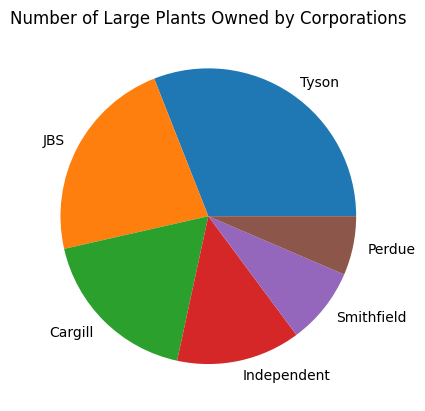

In [7]:
# Number of large plants but shows only Corps who have 10 or more plants
df_large = fsis_raw[fsis_raw["Size"] == "Large"]
large_plant_corps = df_large["Parent Corporation"].value_counts()
large_plant_corps[large_plant_corps >= 10].plot(kind="pie", title="Number of Large Plants Owned by Corporations", ylabel="")

len(large_plant_corps)

<Axes: title={'center': 'Large Tyson Chicken Processing Plants by State'}, xlabel='State', ylabel='Count'>

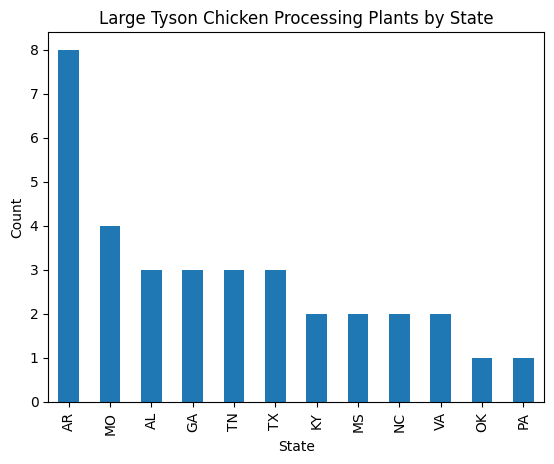

In [8]:
# State level distribution of Tyson plants

df_tyson = df_large[(df_large["Parent Corporation"] == "Tyson")]
df_tyson_chicken = df_tyson[(df_tyson["Animals Processed"] == "Chicken")]
df_tyson_chicken["State"].value_counts().plot(kind="bar", title="Large Tyson Chicken Processing Plants by State", ylabel="Count")